### Importando bibliotecas necessárias

In [57]:
import pandas as pd
import csv
from graph_tool import Graph
import os
from graph_tool import util
import netpixi
import pickle

from regression.integration.gt import *
from netpixi.integration.gt import *

### Dataset NBA players

In [58]:
import pandas as pd
df=pd.read_csv("all_seasons.csv")
df_new=df[['player_name','team_abbreviation','season']]
df_new

,player_name,team_abbreviation,season
0,Dennis Rodman,CHI,1996-97
1,Dwayne Schintzius,LAC,1996-97
2,Earl Cureton,TOR,1996-97
3,Ed O'Bannon,DAL,1996-97
4,Ed Pinckney,MIA,1996-97
...,...,...,...
12300,Markieff Morris,MIA,2021-22
12301,Markelle Fultz,ORL,2021-22
12302,Marcus Smart,BOS,2021-22
12303,Marcus Garrett,MIA,2021-22


### Criação do grafo

In [59]:
from netpixi.integration.gt import Graph

g = Graph(directed=False) # não dirigido

In [60]:
# lista de jogadores
players = df_new['player_name'].unique().tolist()

In [61]:
# adicionar nós para cada jogador
for player in players:
    g.add_vertex(player)

In [62]:
# filtra os jogadores que jogaram juntos em uma temporada
df_filtered = df_new.groupby(['team_abbreviation', 'season']).filter(lambda x: len(x) > 1)

# adiciona as arestas ao grafo
for _, group in df_filtered.groupby(['team_abbreviation', 'season']):
    players = group['player_name'].tolist()
    for i in range(len(players)):
        for j in range(i+1, len(players)):
            # verifica se a aresta já existe no grafo
            if not g.has_edge(players[i], players[j]):
                # adiciona a aresta ao grafo
                g.add_edge(players[i], players[j])

### Análise Exploratória

#### a) Numero de vertices,arestas,densidade

In [63]:
#número de vértices
n = g.num_vertices()
print('O número de vértices é {0}'.format(n))

O número de vértices é 2463


In [64]:
#número de arestas
m = g.num_edges()
print('O número de arestas é {0}'.format(m))

O número de arestas é 70255


In [65]:
##densidade
max_edges = n * (n - 1)
d = m / max_edges
print('A densidade é {0}'.format(round(d,4)))

A densidade é 0.0116


In [66]:
data_targets = pd.DataFrame({k: list(v) for k, v in g.vp.items()})
data_targets.head()

,id
0,Dennis Rodman
1,Dwayne Schintzius
2,Earl Cureton
3,Ed O'Bannon
4,Ed Pinckney


#### B) Estatísticas e histograma do degree. (não é necessário in-degree e out-degree)

In [67]:
degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())

data_targets['degree'] = degrees
data_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2463 non-null   object
 1   degree  2463 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.6+ KB


count    2463.000000
mean       57.048315
std        40.540596
min        12.000000
25%        23.000000
50%        45.000000
75%        82.000000
max       226.000000
Name: degree, dtype: float64

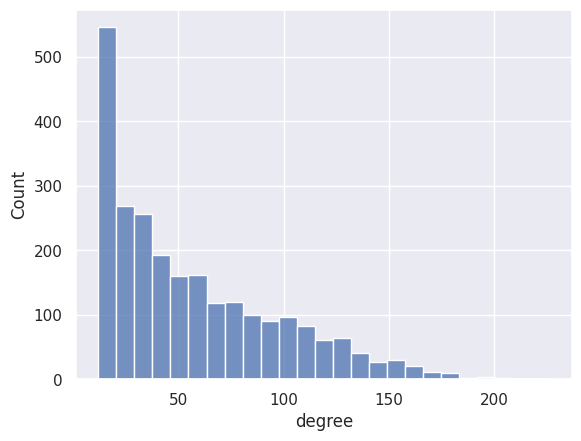

In [71]:
import seaborn as sns
sns.histplot(data_targets['degree'])
data_targets['degree'].describe()

### Análise Visual do Grafo

#### A) Salvando o arquivo

In [69]:
gt_save(g,'Nba_teams.gz')
g = gt_clean(g)

#### B) Visualizando o grafo

In [70]:
g = gt_load('../notebooks/Nba_teams.gz')
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
r=netpixi.render('Nba_teams.gz',infinite=True);

#### C) Ajustando as propriedades visuais do grafo

In [72]:
# # mudar a cor de fundo do grafo
# r.graph(color=0xdddddd)

# # mudar a cor e o tamanho dos vértices
# r.vertex_default(color=0xcccccc, size=15)

# # mudar a cor, a espessura e a curvatura das arestas
# r.edge_default(color=0x000000, width=3, curve1=2, curve2=2)